In [35]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('datasets/scaled_data.csv')

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [49]:
df.shape

(768, 9)

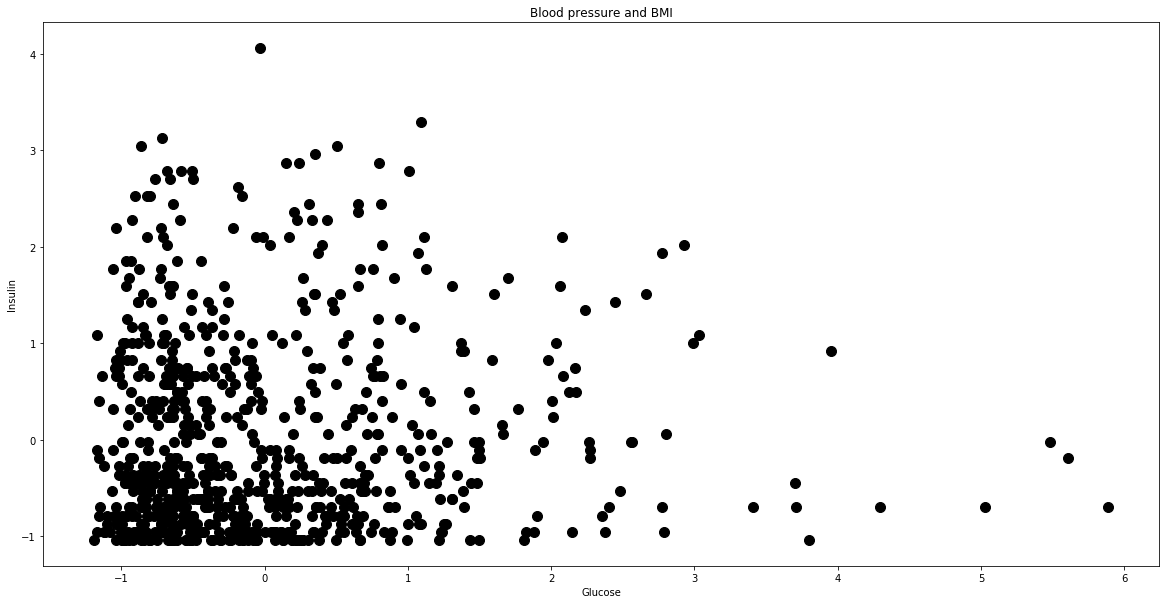

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(df['DiabetesPedigreeFunction'],
            df['Age'],
            color='black',
            s=100)

ax.set(xlabel='Glucose', ylabel='Insulin', title='Blood pressure and BMI')
plt.show();

In [51]:
X = df[:-1]

In [52]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [53]:
isf = IsolationForest(behaviour='new', contamination=0.2)

In [54]:
#-1 indicates outliers, 1 indicates inliers data
y_pred = isf.fit_predict(X)
y_pred

array([ 1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1

In [55]:
#not sure why the size of them are not equial. So, I added one more value to y_pred
n_outliers = (y_pred == -1).sum()
n_outliers

154

In [56]:
b= np.array([1])
y_pred = np.concatenate((y_pred, b), axis=0)

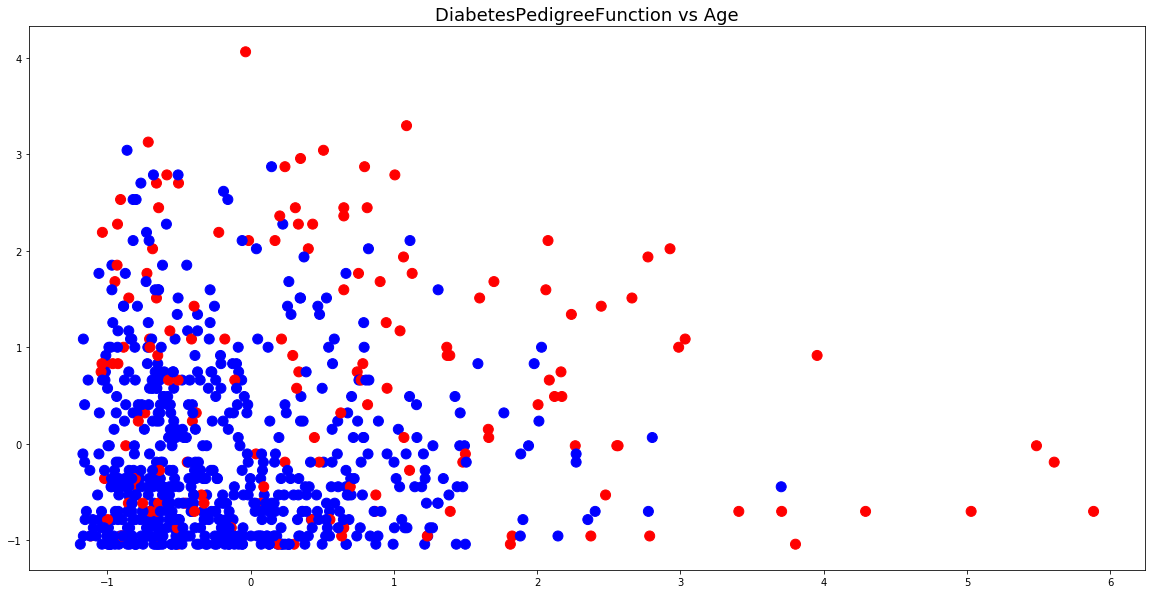

In [57]:
colors = np.array(['r','b'])

plt.figure(figsize=(20,10))

plt.title("DiabetesPedigreeFunction vs Age", size=18)

plt.scatter(df['DiabetesPedigreeFunction'],
            df['Age'],
            color=colors[(y_pred+1) // 2 ],
            s=100)

plt.show();